In [215]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [216]:
from sklearn.datasets import make_circles

In [217]:
X,y = make_circles(1000,noise = 0.03,random_state=42)

#### Convert to Dataframe

In [218]:
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})

#### Visualization

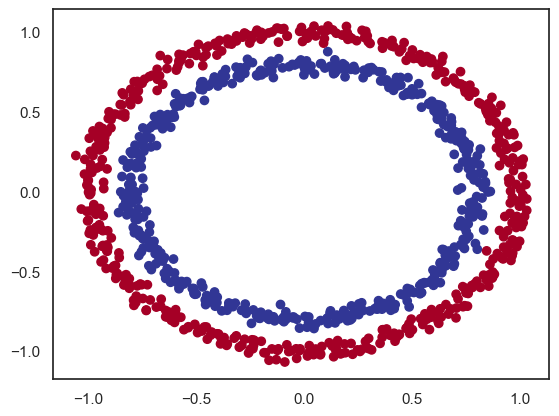

In [219]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Tensorflow model building

In [221]:
import tensorflow as tf

In [222]:
model_one = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),    
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),

])
model_one.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=['accuracy'])
history = model_one.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 482us/step - loss: 0.6888 - accuracy: 0.5188
Epoch 2/25
25/25 [==============================] - 0s 393us/step - loss: 0.6831 - accuracy: 0.5000
Epoch 3/25
25/25 [==============================] - 0s 363us/step - loss: 0.6715 - accuracy: 0.5537
Epoch 4/25
25/25 [==============================] - 0s 375us/step - loss: 0.6500 - accuracy: 0.5975
Epoch 5/25
25/25 [==============================] - 0s 382us/step - loss: 0.5949 - accuracy: 0.8087
Epoch 6/25
25/25 [==============================] - 0s 404us/step - loss: 0.4861 - accuracy: 0.9200
Epoch 7/25
25/25 [==============================] - 0s 380us/step - loss: 0.3178 - accuracy: 0.9900
Epoch 8/25
25/25 [==============================] - 0s 373us/step - loss: 0.1643 - accuracy: 1.0000
Epoch 9/25
25/25 [==============================] - 0s 401us/step - loss: 0.0828 - accuracy: 1.0000
Epoch 10/25
25/25 [==============================] - 0s 415us/step - loss: 0.0470 - accuracy: 1.0000

In [223]:
#Plot decision Boundary
import numpy as np
import matplotlib.pyplot as plt
def plot_decision(X,y,model):
    xmin,xmax = X[:,0].min()-0.1,X[:,0].max()+0.1
    ymin,ymax = X[:,1].min()-0.1,X[:,1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100),
                       np.linspace(ymin, ymax, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    
    if model.output_shape[-1] > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
        
    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1],c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())   

In [224]:
# Evaluate our model on the test set
loss, accuracy = model_one.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 449us/step - loss: 0.0089 - accuracy: 1.0000
Model loss on the test set: 0.008946449495851994
Model accuracy on the test set: 100.00%


313/313 [==============================] - 0s 186us/step


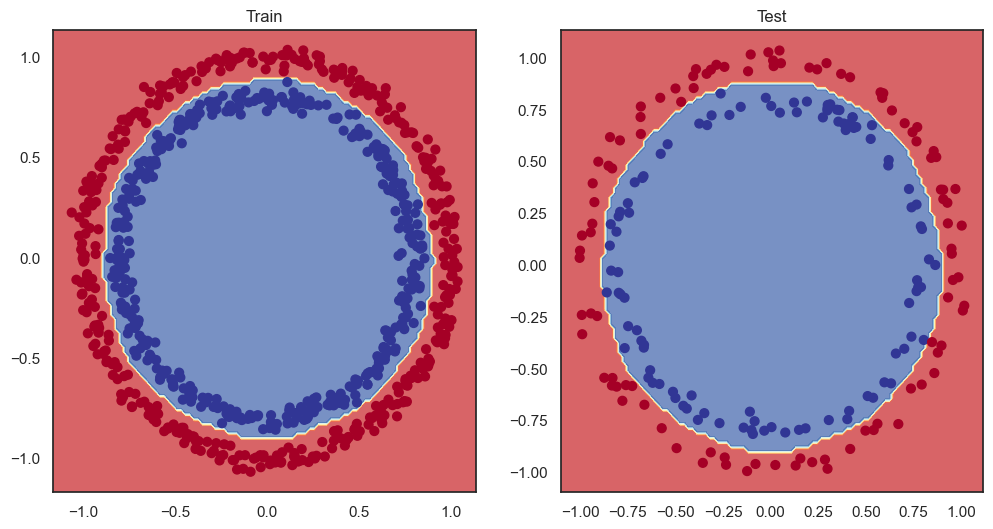

In [225]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_one, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_one, X=X_test, y=y_test)
plt.show()

In [229]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy
0,0.688806,0.51875
1,0.683061,0.50000
2,0.671522,0.55375
3,0.650045,0.59750
4,0.594857,0.80875
5,0.486102,0.92000
6,0.317791,0.99000
7,0.164270,1.00000
8,0.082820,1.00000
9,0.047017,1.00000


Text(0.5, 1.0, 'Model One Loss curve')

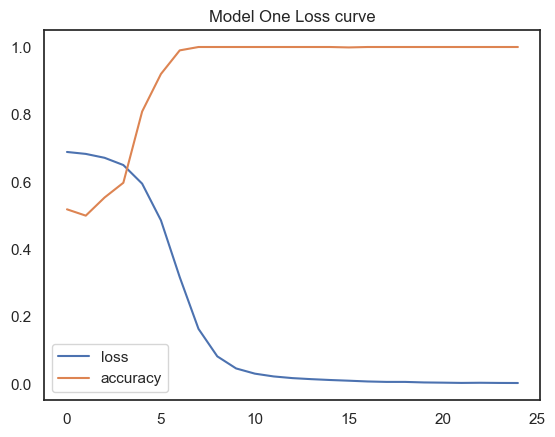

In [231]:
history_df.plot()
plt.title("Model One Loss curve")

In [232]:
# Finding the best learning rate

In [246]:
# Learning rate callback
model_two = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
model_two.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                  optimizer = tf.keras.optimizers.legacy.Adam(),
                  metrics = ['accuracy']
                 )
history = model_two.fit(X_train,y_train,epochs = 100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 419us/step - loss: 0.6899 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 910us/step - loss: 0.6888 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 387us/step - loss: 0.6880 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 405us/step - loss: 0.6870 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 403us/step - loss: 0.6860 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 388us/step - loss: 0.6848 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 398us/step - loss: 0.6836 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 384us/step - loss: 0.6816 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

25/25 [==============================] - 0s 377us/step - loss: 0.7070 - accuracy: 0.4650 - lr: 0.3162
Epoch 72/100
25/25 [==============================] - 0s 387us/step - loss: 0.7001 - accuracy: 0.4875 - lr: 0.3548
Epoch 73/100
25/25 [==============================] - 0s 381us/step - loss: 0.6981 - accuracy: 0.4975 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 373us/step - loss: 0.6972 - accuracy: 0.5050 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 384us/step - loss: 0.7045 - accuracy: 0.4600 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 386us/step - loss: 0.6982 - accuracy: 0.5100 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 371us/step - loss: 0.6981 - accuracy: 0.4875 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 380us/step - loss: 0.7091 - accuracy: 0.5025 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 385us/step - loss: 0.7046 - accuracy

In [247]:
pd.DataFrame(history.history)

,loss,accuracy,lr
0,0.689884,0.5000,0.000100
1,0.688835,0.5000,0.000112
2,0.688004,0.5000,0.000126
3,0.686956,0.5000,0.000141
4,0.685979,0.5000,0.000158
...,...,...,...
95,0.795407,0.5000,5.623413
96,0.871993,0.4550,6.309574
97,1.032849,0.5000,7.079458
98,0.843326,0.5050,7.943282


<Axes: >

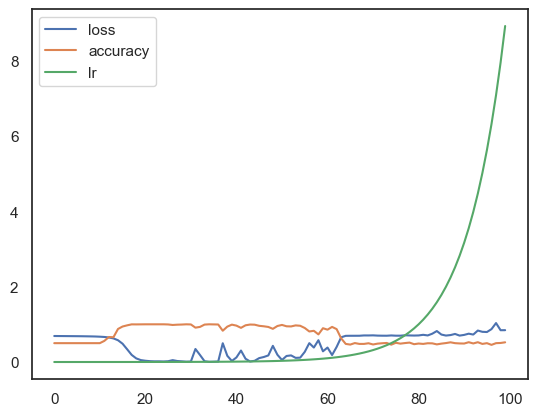

In [248]:
pd.DataFrame(history.history).plot()

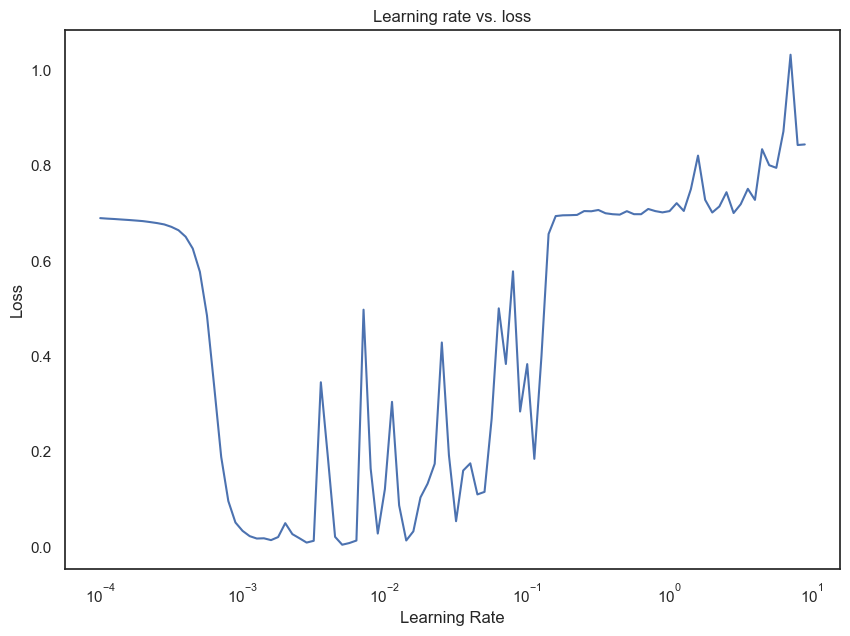

In [250]:
# Plot learning rate vs loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");